[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Zero-Shot Object Detection with Grounding DINO

---

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb) [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/GroundingDINO) [![arXiv](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://arxiv.org/abs/2303.05499)

Grounding DINO can detect **arbitrary objects** with human inputs such as category names or referring expressions. The key solution of open-set object detection is introducing language to a closed-set detector DINO. for open-set concept generalization. If you want to learn more visit official GitHub [repository](https://github.com/IDEA-Research/GroundingDINO) and read the [paper](https://arxiv.org/abs/2303.05499).

![grounding dino figure](https://media.roboflow.com/notebooks/examples/grounding-dino-figure.png)

## Complementary Materials

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/grounding-dino-zero-shot-object-detection) [![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/cMa77r3YrDk)

We recommend that you follow along in this notebook while reading the blog post on Grounding DINO. We will talk about the advantages of Grounding DINO, analyze the model architecture, and provide real prompt examples.

![grounding dino](https://media.roboflow.com/notebooks/examples/grounding-dino.png)

## ⚠️ Disclaimer

Grounding DINO codebase is still under development. If you experience any problems with launching the notebook, please let us know and create [issues](https://github.com/roboflow/notebooks/issues) on our GitHub.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install Grounding DINO 🦕
- Download Grounding DINO Weights 🏋️
- Download Example Data
- Load Grounding DINO Model
- Grounding DINO Demo
- Grounding DINO with Roboflow Dataset
- 🏆 Congratulations

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕

In [4]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 430 (delta 149), reused 130 (delta 126), pack-reused 232
Receiving objects: 100% (430/430), 12.86 MiB | 29.85 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━

In [5]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [6]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [7]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

In [ ]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


### 2.1. Load Data ###
Now load the videos and extract a set number of frames

In [8]:
%cd {HOME}

/content


In [9]:
# working with the drive
from google.colab import drive

In [ ]:
# mount drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.


In [ ]:
import zipfile

In [ ]:
# unzip image data - this may take a couple of minutes to run
def unzip(zip_file_path):
    # Check if the zip file exists
    if not os.path.exists(zip_file_path):
        print("Zip file not found.")
        return

    # Unzipping the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(HOME)  # Extracts to the current working directory

    print(f"Unzipped files from {zip_file_path} to the current directory.")

In [ ]:
# unzip file
zip_file_path = '/content/drive/MyDrive/PenguinPiTestSet1/PenguinPiTestSet1-20240313-001.zip'  # Replace with your zip file path
unzip(zip_file_path)

In [ ]:
import fnmatch

In [ ]:
# Get a list of all the paths to the .mp4 files that have been unzipped

def find_mp4_files(parent_directory):
    mp4_files = []
    for root, dirs, files in os.walk(parent_directory):
        for file in fnmatch.filter(files, '*.mp4'):
            mp4_files.append(os.path.join(root, file))
    return mp4_files

In [ ]:
# Example usage
parent_directory = '/content/PenguinPiTestSet1'
mp4_files = find_mp4_files(parent_directory)
print(mp4_files)

['/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-04_08-00/PenguinPi1_video_2024-03-04_08-00.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_06-43/PenguinPi1_video_2024-03-02_06-43.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-03_09-22/PenguinPi1_video_2024-03-03_09-22.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_07-25/PenguinPi1_video_2024-03-02_07-25.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_10-07/PenguinPi1_video_2024-03-02_10-07.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-03_11-11/PenguinPi1_video_2024-03-03_11-11.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_07-15/PenguinPi1_video_2024-03-02_07-15.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_14-05/PenguinPi1_video_2024-03-02_14-05.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_14-56/PenguinPi1_video_2024-03-02_14-56.mp4', '/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-03_11-36/PenguinPi1_video_20

In [ ]:
# decide on size of test, val and train sets (150, 25, 25)
# use one video for val and another for test, then all the rest of the videos for the train set
train_videos = []
val_videos = []
test_videos = []
train_videos = mp4_files[:-2]
val_videos.append(mp4_files[-2])
test_videos.append(mp4_files[-1])

In [ ]:
print(len(mp4_files), len(train_videos), len(val_videos), len(test_videos))

10 8 1 1


In [ ]:
# checking that they contain different videos
print(train_videos[-1])
print(val_videos)
print(test_videos)

/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_14-05/PenguinPi1_video_2024-03-02_14-05.mp4
['/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-02_14-56/PenguinPi1_video_2024-03-02_14-56.mp4']
['/content/PenguinPiTestSet1/PenguinPi1_video_2024-03-03_11-36/PenguinPi1_video_2024-03-03_11-36.mp4']


In [ ]:
# extract a set number of frames per video to a directory

In [ ]:
import cv2
import numpy as np

In [ ]:
def extract_frames(video_path, num_frames, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Capture the video
    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print("Error: Could not open video.")
        return

    # Get the total number of frames in the video
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval at which to capture frames
    interval = total_frames // num_frames

    # Get the name of the video to be used in naming the video frames
    video_name = video_path.rsplit('/', 1)[-1]

    # Extract frames
    for i in range(num_frames):
        # Set the next frame to capture
        video.set(cv2.CAP_PROP_POS_FRAMES, i * interval)

        # Read the next frame
        success, frame = video.read()
        if not success:
            break

        # Save the frame
        frame_filename = os.path.join(output_dir, f"frame_{video_name}_{i}.jpg")
        cv2.imwrite(frame_filename, frame)
        #print(f"Saved {frame_filename}")

    # Release the video capture object
    video.release()
    print(f"Finished extracting frames from {video_name}.")


In [ ]:
# decide on number of frames per video in train set
# we want around 160 and 20 for test and 20 for val
# so for 8 training videos that is 20 frames per video (same for test and val)

In [ ]:
HOME

'/content'

In [ ]:
for video_path in train_videos:
  extract_frames(video_path, 20, f'{HOME}/training_frames')

Finished extracting frames from PenguinPi1_video_2024-03-04_08-00.mp4.
Finished extracting frames from PenguinPi1_video_2024-03-02_06-43.mp4.
Finished extracting frames from PenguinPi1_video_2024-03-03_09-22.mp4.
Finished extracting frames from PenguinPi1_video_2024-03-02_07-25.mp4.
Finished extracting frames from PenguinPi1_video_2024-03-02_10-07.mp4.
Finished extracting frames from PenguinPi1_video_2024-03-03_11-11.mp4.
Finished extracting frames from PenguinPi1_video_2024-03-02_07-15.mp4.
Finished extracting frames from PenguinPi1_video_2024-03-02_14-05.mp4.


In [ ]:
for video_path in test_videos:
  extract_frames(video_path, 20, f'{HOME}/test_frames')

Finished extracting frames from PenguinPi1_video_2024-03-03_11-36.mp4.


In [ ]:
for video_path in val_videos:
  extract_frames(video_path, 20, f'{HOME}/val_frames')

Finished extracting frames from PenguinPi1_video_2024-03-02_14-56.mp4.


## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Grounding DINO Demo

In [ ]:
import supervision as sv

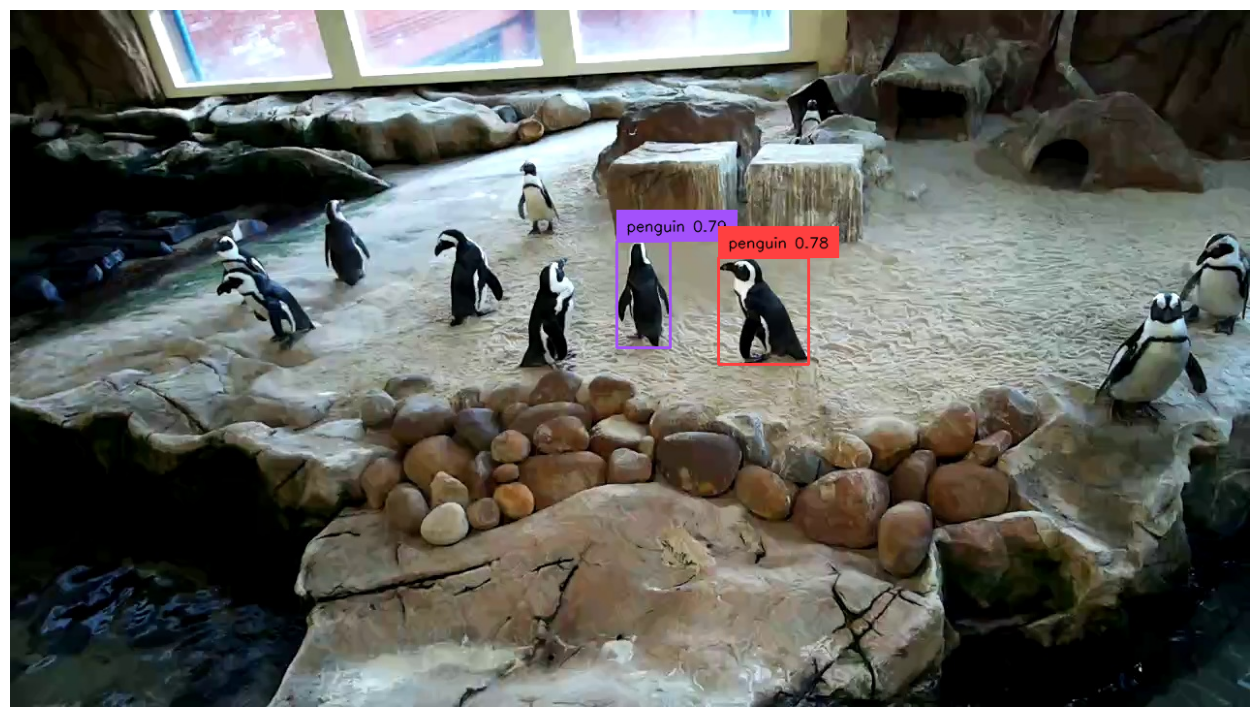

In [ ]:

IMAGE_NAME = "frame_PenguinPi1_video_2024-03-03_11-36.mp4_0.jpg" #/content/test_frames/frame_PenguinPi1_video_2024-03-03_11-36.mp4_0.jpg"
IMAGE_PATH = os.path.join(HOME, "test_frames", IMAGE_NAME)

TEXT_PROMPT = "penguin"
BOX_TRESHOLD = 0.78
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [1]:
import torch

# Creating the tensor
boxes2 = torch.tensor([[0.3, 1.0, 0.0426, 0.1524],
                       [0.6077, 0.4328, 0.0732, 0.1521]])

print(boxes2)


tensor([[0.3000, 1.0000, 0.0426, 0.1524],
        [0.6077, 0.4328, 0.0732, 0.1521]])


In [ ]:
#bb = (origin in top corner) (distance from x origin (starting off screen), distance from y origin (starting off screen), x distance - width, y distance - height)

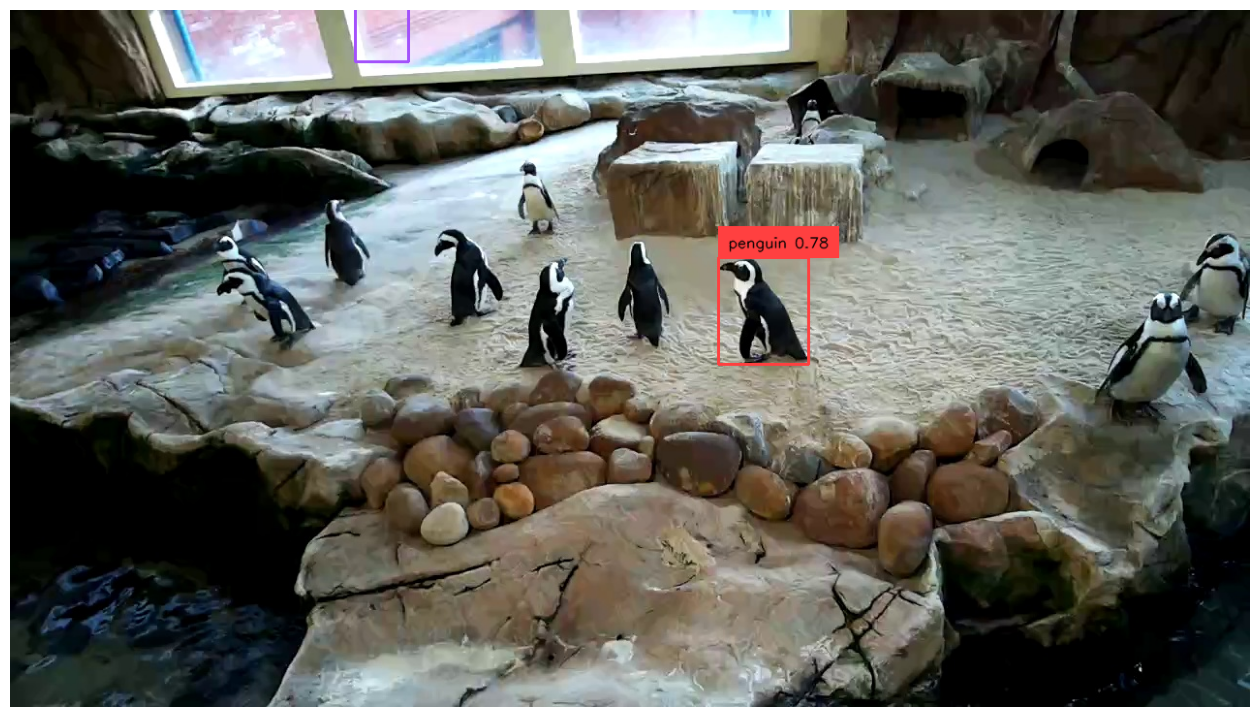

In [ ]:
annotated_frame2 = annotate(image_source=image_source, boxes=boxes2, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame2, (16, 16))

In [ ]:
image.type()

'torch.FloatTensor'

In [ ]:
print(image.size())

torch.Size([3, 750, 1333])


In [ ]:
image_source.shape

(720, 1280, 3)

In [ ]:
print(len(image_source[0]))

1280


In [ ]:
print(len(image_source))

720


In [ ]:
print(logits)

tensor([0.7908, 0.7831])


In [ ]:
print(phrases)

['penguin', 'penguin']


In [ ]:
print(boxes)

tensor([[0.5110, 0.4089, 0.0426, 0.1524],
        [0.6077, 0.4328, 0.0732, 0.1521]])


In [ ]:
print(annotated_frame.shape)

(720, 1280, 3)


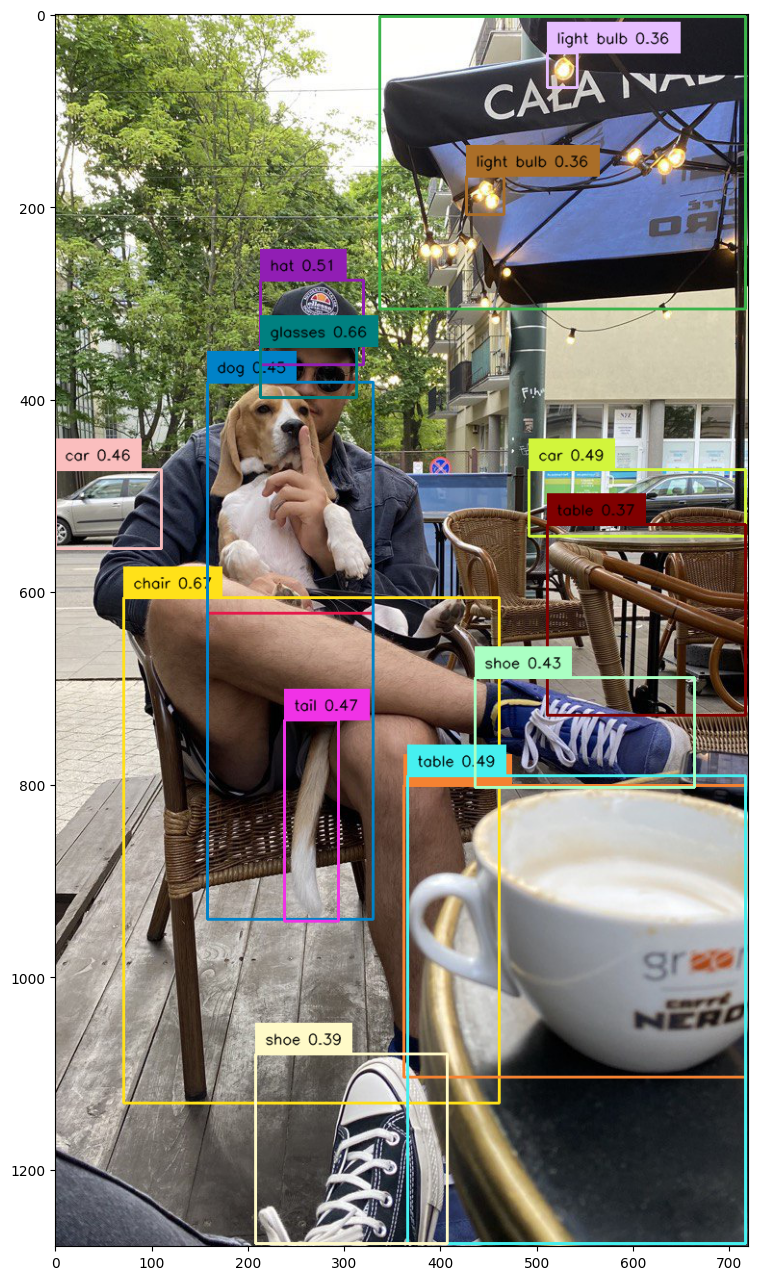

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-3.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "chair, dog, table, shoe, light bulb, coffee, hat, glasses, car, tail, umbrella"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

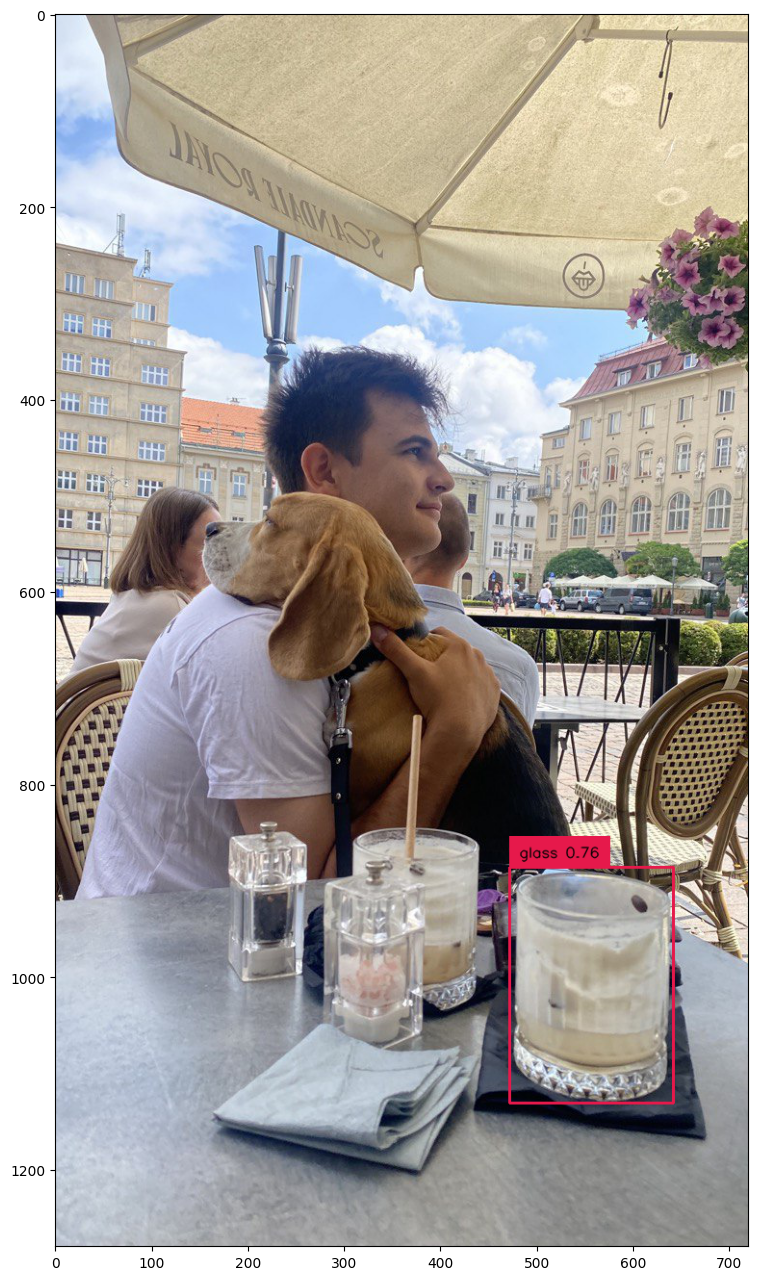

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-2.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "glass most to the right"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

## Grounding DINO with Roboflow Dataset

In [ ]:
%cd {HOME}

/content


In [ ]:
import roboflow

roboflow.login()

You are already logged into Roboflow. To make a different login, run roboflow.login(force=True).


In [ ]:
from random import randrange
from roboflow.core.dataset import Dataset


def pick_random_image(dataset: Dataset, subdirrectory: str = "valid") -> str:
    image_directory_path = f"{dataset.location}/{subdirrectory}"
    image_names = os.listdir(image_directory_path)
    image_index = randrange(len(image_names))
    image_name = image_names[image_index]
    image_path = os.path.join(image_directory_path, image_name)
    return image_path

In [ ]:
from roboflow import Roboflow
rf = Roboflow()
project = rf.workspace("work-safe-project").project("safety-vest---v4")
dataset = project.version(3).download("coco")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Safety-vest---v4-3 in coco:: 100%|██████████| 438/438 [00:00<00:00, 836.65it/s]


In [ ]:
TEXT_PROMPT = ", ".join(project.classes.keys())
TEXT_PROMPT

'reflective, not_helmet, helmet, not_reflective'

In [ ]:
image_path = pick_random_image(dataset=dataset)

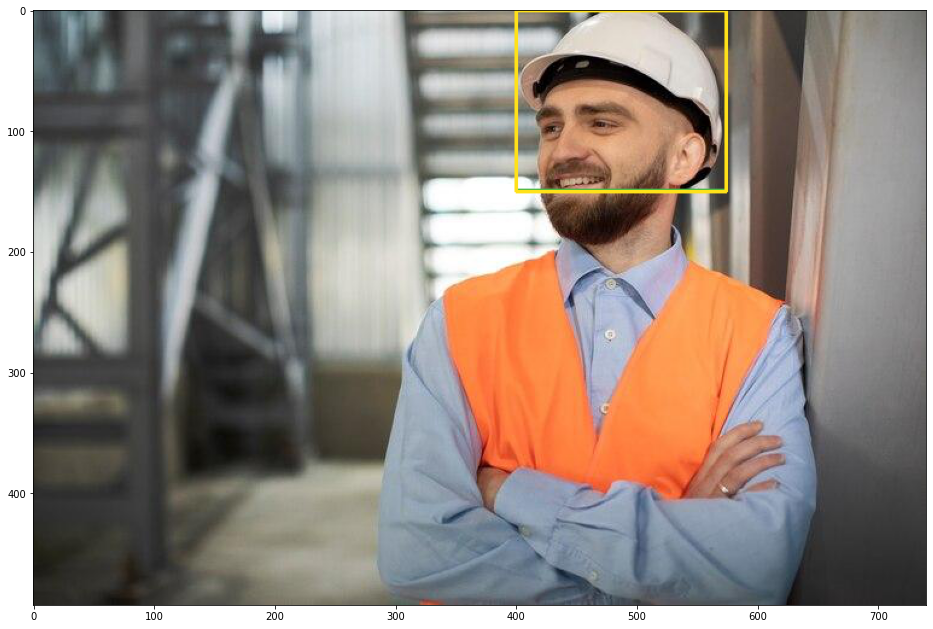

In [ ]:
import os
import supervision as sv

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(image_path)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

**NOTE:** The design of the prompt is very important. Try to be as accurate as possible. Avoid abbreviations.

In [ ]:
TEXT_PROMPT = "reflective safety vest, helmet, head, nonreflective safety vest"

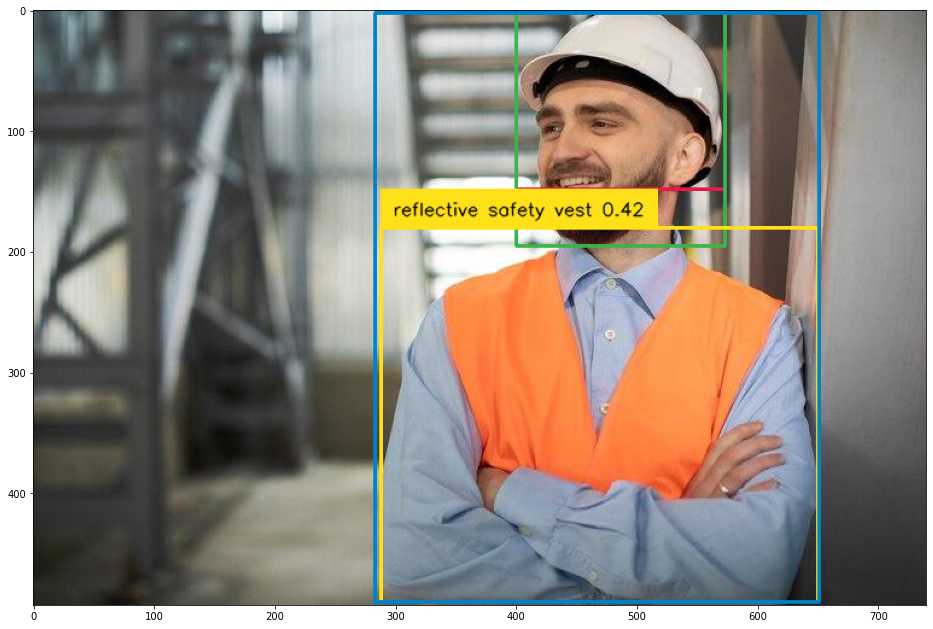

In [ ]:
import os
import supervision as sv

BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(image_path)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.